# Simulation Test
Test if the learning works

In [1]:
# this file's version
from datetime import datetime as dt
print("Notebook version as of", dt.today().date())

Notebook version as of 2018-11-23


## Imports

In [2]:
cd ../aei

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cd agents/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/agents


In [5]:
# import agent
from detQ import detQ

In [6]:
cd ../envs/

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public/aei/envs


In [7]:
# import environments
from Env_2StatePD import TwoStatePD
from Env_2StateMatchingPennies import TwoStateMatchingPennies

## Parameters

In [8]:
cd ../../

/home/wbarfuss/Drive/3.2_Beruf/1_Projects/01_DetRL/DetRL_Code/public


In [9]:
R = TwoStateMatchingPennies().RewardTensor()
T = TwoStateMatchingPennies().TransitionTensor()

In [10]:
alpha = 0.8
beta = 4.0
gamma = 0.1

In [11]:
Qls = detQ(T, R, alpha, beta, gamma)

## Learning

In [12]:
agents = Qls

In [13]:
X = agents.random_behavior()

steps = 100

Xtraj = np.ones((steps,) + X.shape)
Vtraj = np.ones((steps, 2))

for t in range(steps):
    Xtraj[t] = X
    
    Ris = agents.obtain_Ris(X)
    δ = agents.obtain_statdist(X)
    Vtraj[t] = np.sum(δ.T * Ris, axis=1)
    
    X = agents.TDstep(X)

<IPython.core.display.Javascript object>


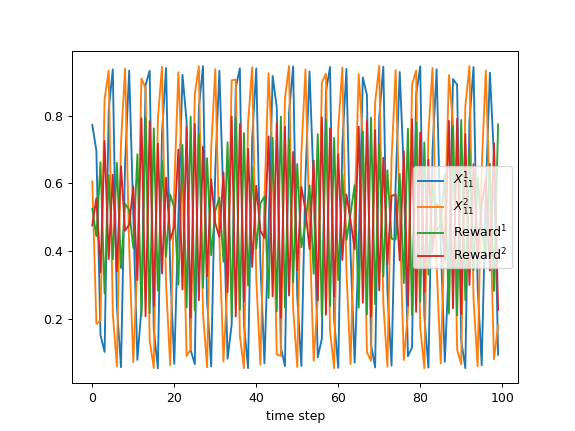

In [14]:
plt.figure()
plt.plot(Xtraj[:, 0, 0, 0], label=r"$X^1_{11}$")
plt.plot(Xtraj[:, 1, 0, 0], label=r"$X^2_{11}$")
plt.plot(Vtraj[:, 0], label=r"Reward${}^1$")
plt.plot(Vtraj[:, 1], label=r"Reward${}^2$")

plt.legend()
plt.xlabel("time step");